## 1 Objetivo.
  
 - Neste notebook iremos explorar, analisar e preparar os dados para modelagem e por mei da análise dos dados explorados, será possivel tirar algumas conclusões sobre o negócio em questão.
 

 - Importando as bibliotecas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importando e fazendo um tratamento na base de dados

 - Importandos os dados do Studio.

In [2]:
url='https://raw.githubusercontent.com/robertferro/studio-estetica/main/studio_estetica.csv'

In [3]:
dados=pd.read_csv(url, sep=';',decimal=',')

In [4]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
0,NaN,20.0,30.0,30.0,10.0,100.0,400.0,100.0,80.0,60.0,250.0,150.0,80.0,250.0,80.0,150.0,0.0,0.0
1,23/12/2018,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,270.0
2,24/12/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25/12/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26/12/2018,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,560.0


 - Excluindo os valores nulos

In [5]:
dados.isna().sum()

data_atendimento          2
design_de_sobrancelhas    0
design_coloracao          0
design_coloracao_buco     0
buco                      0
brown_lamination          0
micropigmentacao          0
extensao_de_cilios        0
lash_lifting              0
limpeza_de_pele           0
microagulhamento          0
peeling_quimico           0
massagem_relaxante        0
pacote_massagem_5         0
drenagem_linfatica        0
striort                   0
qtde_clientes             0
faturamento               0
dtype: int64

In [6]:
dados=dados.dropna()

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 1 to 741
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        740 non-null    object 
 1   design_de_sobrancelhas  740 non-null    float64
 2   design_coloracao        740 non-null    float64
 3   design_coloracao_buco   740 non-null    float64
 4   buco                    740 non-null    float64
 5   brown_lamination        740 non-null    float64
 6   micropigmentacao        740 non-null    float64
 7   extensao_de_cilios      740 non-null    float64
 8   lash_lifting            740 non-null    float64
 9   limpeza_de_pele         740 non-null    float64
 10  microagulhamento        740 non-null    float64
 11  peeling_quimico         740 non-null    float64
 12  massagem_relaxante      740 non-null    float64
 13  pacote_massagem_5       740 non-null    float64
 14  drenagem_linfatica      740 non-null    fl

In [8]:
# lista_cols=['design_de_sobrancelhas', 'design_coloracao',
#        'design_coloracao_buco', 'buco', 'brown_lamination', 'micropigmentacao',
#        'extensao_de_cilios', 'lash_lifting', 'limpeza_de_pele',
#        'microagulhamento', 'peeling_quimico', 'massagem_relaxante',
#        'pacote_massagem_5', 'drenagem_linfatica', 'striort', 'qtde_clientes',
#        'faturamento']

# for i in lista_cols:
#     dados[i]=dados[i].astype(float)

 - Convertendo a coluna "data_atendimento" para o formato datetime

In [9]:
dados['data_atendimento'] = pd.to_datetime(dados['data_atendimento'],format=r"%d/%m/%Y")

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 1 to 741
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_atendimento        740 non-null    datetime64[ns]
 1   design_de_sobrancelhas  740 non-null    float64       
 2   design_coloracao        740 non-null    float64       
 3   design_coloracao_buco   740 non-null    float64       
 4   buco                    740 non-null    float64       
 5   brown_lamination        740 non-null    float64       
 6   micropigmentacao        740 non-null    float64       
 7   extensao_de_cilios      740 non-null    float64       
 8   lash_lifting            740 non-null    float64       
 9   limpeza_de_pele         740 non-null    float64       
 10  microagulhamento        740 non-null    float64       
 11  peeling_quimico         740 non-null    float64       
 12  massagem_relaxante      740 non-null    float64   

## 3. EDA

In [11]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
design_de_sobrancelhas,740.0,0.408108,0.861719,0.0,0.0,0.0,0.0,5.0
design_coloracao,740.0,0.245946,0.616900,0.0,0.0,0.0,0.0,4.0
design_coloracao_buco,740.0,0.708108,1.936387,0.0,0.0,0.0,1.0,19.0
buco,740.0,0.217568,0.581598,0.0,0.0,0.0,0.0,4.0
brown_lamination,740.0,0.001351,0.036761,0.0,0.0,0.0,0.0,1.0
micropigmentacao,740.0,0.031014,0.179613,0.0,0.0,0.0,0.0,2.0
extensao_de_cilios,740.0,0.039189,0.199334,0.0,0.0,0.0,0.0,2.0
lash_lifting,740.0,0.031757,0.189379,0.0,0.0,0.0,0.0,2.0
limpeza_de_pele,740.0,0.408108,0.796857,0.0,0.0,0.0,1.0,5.0
microagulhamento,740.0,0.024324,0.154158,0.0,0.0,0.0,0.0,1.0


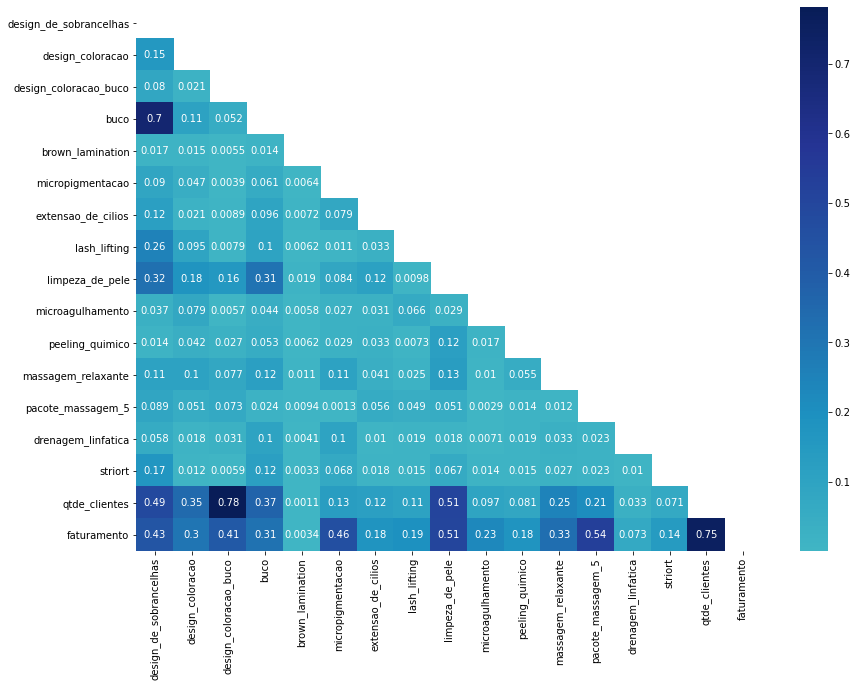

In [12]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

 - Visualizando a distribuição do faturamento e da quantidade de clientes

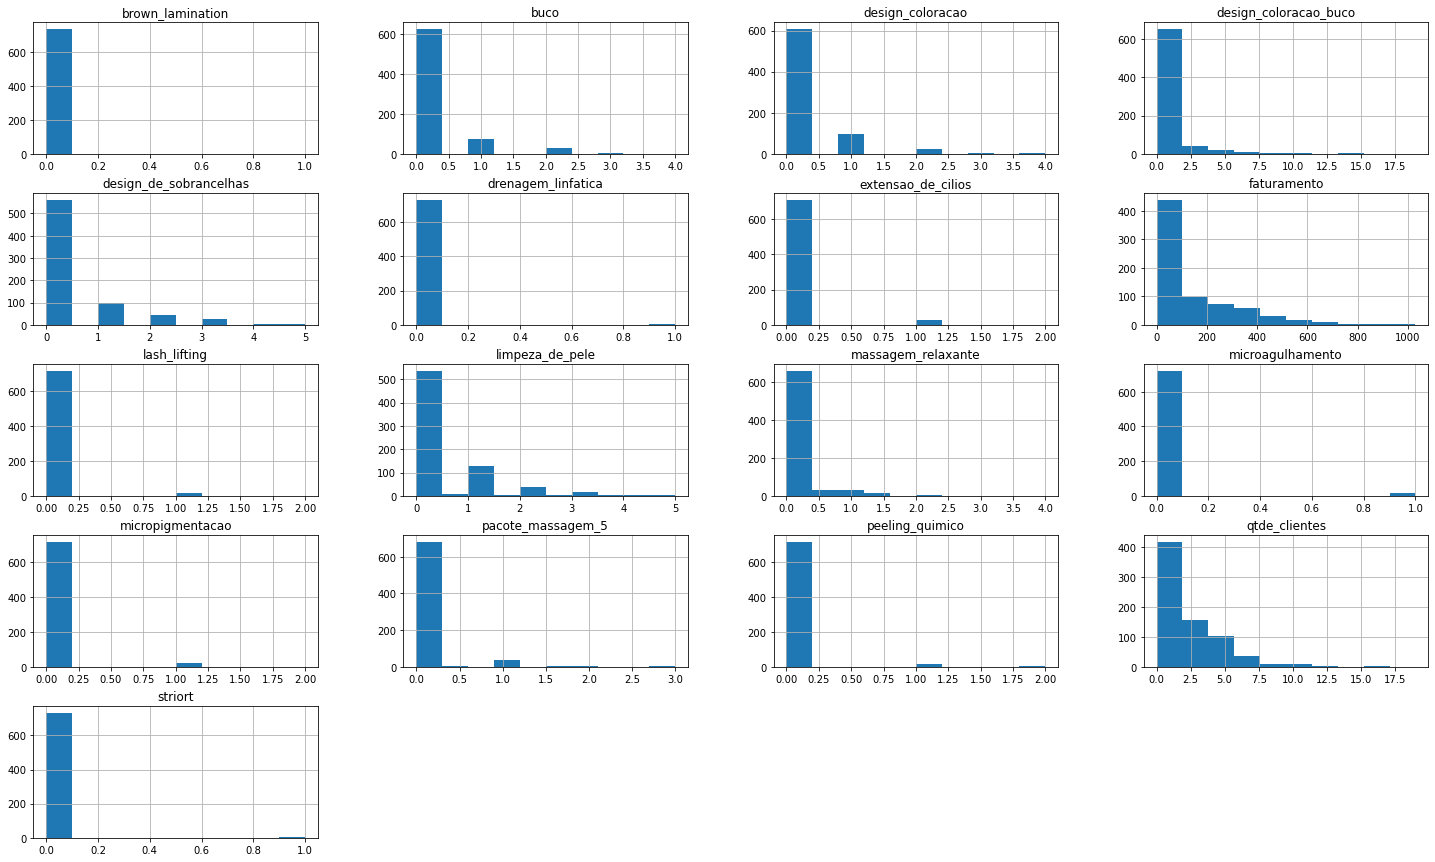

In [13]:
dados.hist(figsize=(25,15))
plt.show()

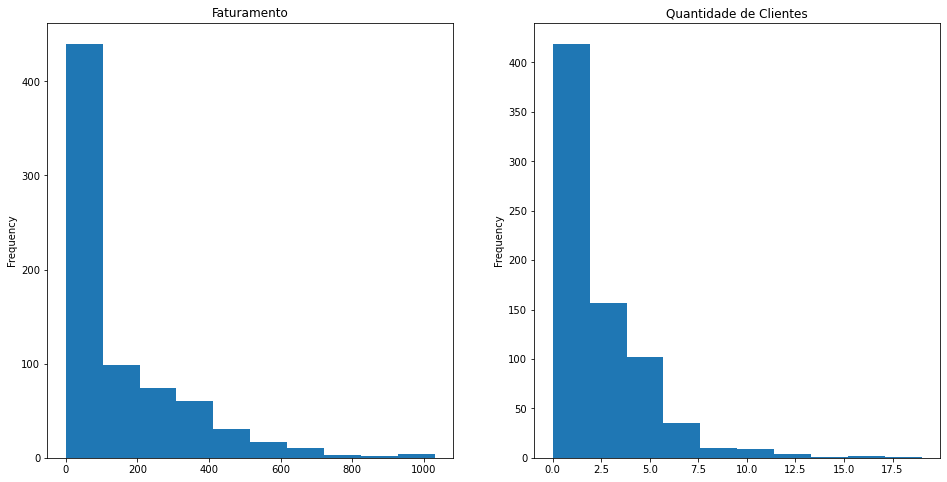

In [14]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
dados.faturamento.plot(kind="hist",ax=ax[0] )
ax[0].set_title('Faturamento')
dados.qtde_clientes.plot(kind="hist",ax=ax[1])
ax[1].set_title('Quantidade de Clientes')
plt.show()

 - Faturamento x Quantidade de clientes

Text(0, 0.5, 'faturamento')

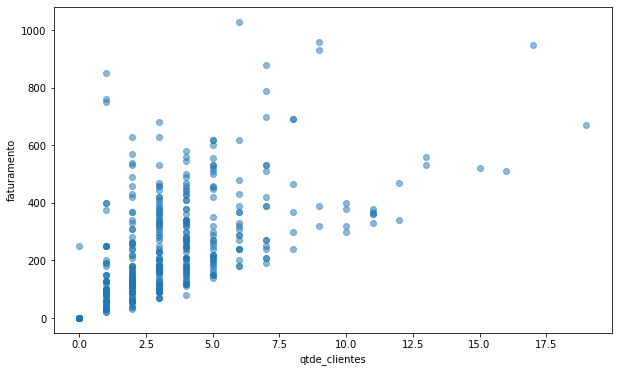

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(dados['qtde_clientes'], dados['faturamento'],alpha=0.5)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('qtde_clientes')
plt.ylabel('faturamento')

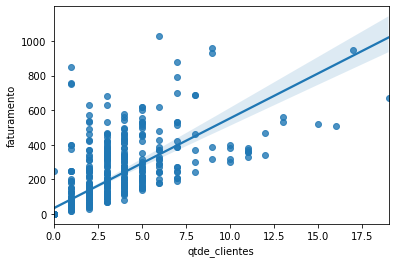

In [16]:
sns.regplot('qtde_clientes','faturamento', data=dados)

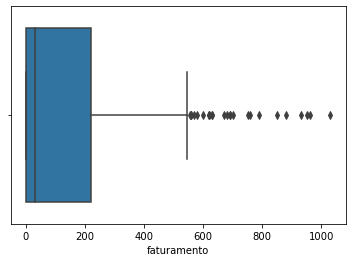

In [17]:
sns.boxplot(x=dados['faturamento'])

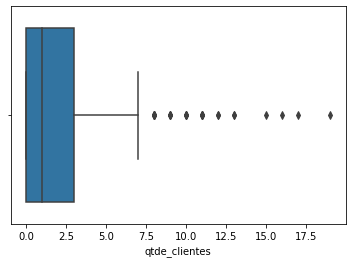

In [18]:
sns.boxplot(x=dados['qtde_clientes'])

 - Agrupando os dados por mês

In [19]:
# dados = dados.set_index('data_atendimento')
# dados_por_mes=dados.resample('M').sum()
dados_por_mes=dados.resample('M', on='data_atendimento').sum()

In [20]:
dados_por_mes.describe().T

,count,mean,std,min,25%,50%,75%,max
design_de_sobrancelhas,25.0,12.080,9.349332,0.0,4.0,11.0,18.0,36.0
design_coloracao,25.0,7.280,5.975784,0.0,2.0,7.0,10.0,24.0
design_coloracao_buco,25.0,20.960,16.699501,0.0,10.0,18.0,24.0,57.0
buco,25.0,6.440,5.000667,0.0,3.0,4.0,10.0,18.0
brown_lamination,25.0,0.040,0.200000,0.0,0.0,0.0,0.0,1.0
micropigmentacao,25.0,0.918,1.650561,0.0,0.0,0.0,1.0,7.0
extensao_de_cilios,25.0,1.160,1.469977,0.0,0.0,1.0,2.0,5.0
lash_lifting,25.0,0.940,2.274496,0.0,0.0,0.0,0.0,9.0
limpeza_de_pele,25.0,12.080,7.329563,0.0,9.0,12.0,15.0,27.5
microagulhamento,25.0,0.720,0.890693,0.0,0.0,0.0,2.0,2.0


In [21]:
mes_ano=['dez_2018','jan_2019','fev_2019','mar_2019','abr_2019','maio_2019','jun_2019','jul_2019','ago_2019',
                      'set_2019','out_2019','nov_2019','dez_2019','jan_2020','fev_2020','mar_2020','abr_2020','maio_2020',
                       'jun_2020','jul_2020','ago_2020','set_2020','out_2020','nov_2020','dez_2020']
dados_por_mes['mes_ano']=mes_ano

In [22]:
dados_por_mes.head()

,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,mes_ano
data_atendimento,,,,,,,,,,,,,,,,,,
2018-12-31,4.0,0.0,9.0,3.0,0.0,1.0,1.5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1110.0,dez_2018
2019-01-31,5.0,5.0,10.0,4.0,0.0,0.0,2.5,0.0,14.0,0.0,2.0,4.0,0.0,3.0,0.0,47.0,2540.0,jan_2019
2019-02-28,3.0,7.0,14.0,1.0,0.0,0.0,3.0,0.0,9.0,0.0,2.0,3.5,3.0,0.0,0.0,40.0,2870.0,fev_2019
2019-03-31,4.0,10.0,13.0,4.0,0.0,0.0,3.0,0.0,12.0,0.0,6.0,0.0,5.0,0.0,0.0,45.0,3980.0,mar_2019
2019-04-30,4.0,8.0,18.0,0.0,0.0,1.0,2.0,0.0,19.0,0.0,1.0,2.5,1.5,0.0,0.0,50.0,3325.0,abr_2019


In [23]:
cols = dados_por_mes.columns.tolist()
cols = cols[-1:] + cols[:-1]
dados_por_mes = dados_por_mes[cols] 

In [24]:
dados_por_mes.head()

,mes_ano,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
data_atendimento,,,,,,,,,,,,,,,,,,
2018-12-31,dez_2018,4.0,0.0,9.0,3.0,0.0,1.0,1.5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1110.0
2019-01-31,jan_2019,5.0,5.0,10.0,4.0,0.0,0.0,2.5,0.0,14.0,0.0,2.0,4.0,0.0,3.0,0.0,47.0,2540.0
2019-02-28,fev_2019,3.0,7.0,14.0,1.0,0.0,0.0,3.0,0.0,9.0,0.0,2.0,3.5,3.0,0.0,0.0,40.0,2870.0
2019-03-31,mar_2019,4.0,10.0,13.0,4.0,0.0,0.0,3.0,0.0,12.0,0.0,6.0,0.0,5.0,0.0,0.0,45.0,3980.0
2019-04-30,abr_2019,4.0,8.0,18.0,0.0,0.0,1.0,2.0,0.0,19.0,0.0,1.0,2.5,1.5,0.0,0.0,50.0,3325.0


 - Criando o DataFrame apenas com faturamento e quantidade de clientes por mês

In [25]:
fat_mensal=dados_por_mes.loc[:,['mes_ano','faturamento','qtde_clientes']]
fat_mensal=fat_mensal.set_index('mes_ano')

 ### Visualizando faturamento mensal e quantidade de clientes por mês.

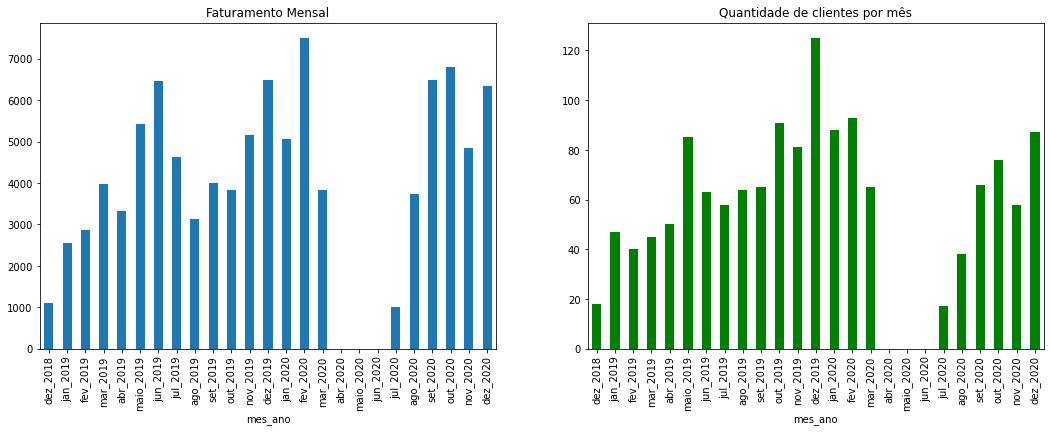

In [26]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
fat_mensal.faturamento.plot.bar(ax=ax[0])
ax[0].set_title('Faturamento Mensal')
fat_mensal.qtde_clientes.plot.bar(ax=ax[1],color='g')
ax[1].set_title('Quantidade de clientes por mês')
plt.xticks();

 - Criando um arquvo CSV que pronto para modelagem.

In [27]:
# dados.to_csv('dados_modelagem.csv', encoding = 'latin-1' )